# Confidence Intervals

## we will use bootstarpping and sampling distribution to get the confidence interval
 1- [sample from all the data](#1-sample-from-all-the-data).<br>
 2- [gererate many samples from the sample (bootstrapping)](#2-gererate-many-samples-from-the-sample-(bootstrapping)).<br>
 3- [calculate the sampling distribution for any statistic](#3-calculate-the-sampling-distribution-for-any-statistic)<br>
 4- [compare to the parameter](#4-compare-to-the-parameter)

### 1-sample from all the data

In [85]:
### 1- sample from all the dataimport pandas as pd
## First Bullet Header <a class="anchor" id="first-bullet"></a>

import numpy as np
np.random.seed(42)

coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_reduced = coffee_full.sample(200) #this is the only data you might actually get in the real world.
coffee_reduced.head()
coffee_reduced.age.unique()

array(['<21', '>=21'], dtype=object)

In [86]:
#What is the proportion of coffee drinkers in the sample?
#What is the proportion of individuals that don't drink coffee?
coffee_reduced['drinks_coffee'].value_counts(normalize=True)

True     0.595
False    0.405
Name: drinks_coffee, dtype: float64

In [87]:
#  Of the individuals who drink coffee,what is the average height?
# Of the individuals who do not drink coffee, what is the average height?
print(coffee_reduced[coffee_reduced['drinks_coffee']== True].height.mean())
print(coffee_reduced[coffee_reduced['drinks_coffee']== False].height.mean())
coffee_reduced.index

68.11962990858618
66.78492279927877


Int64Index([2402, 2864, 2167,  507, 1817, 1234,  685, 1208, 2786, 2029,
            ...
            1432, 2837, 2348, 1557, 1237, 1187,  463, 1195, 1080, 1422],
           dtype='int64', length=200)

### 2-gererate many samples from the sample (bootstrapping)

In [88]:
# Simulate 200 "new" individuals from your original sample of 200. What are the proportion of coffee drinkers 
# in your bootstrap sample? How about individuals that don't drink coffee?
sample=coffee_reduced.sample(200, replace=True)
sample['drinks_coffee'].value_counts(normalize=True)

True     0.605
False    0.395
Name: drinks_coffee, dtype: float64

the distribution is centered around  66.7806168324155
65.9929132815752 67.58402738281573


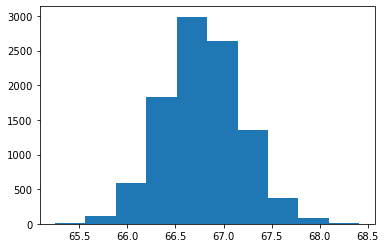

In [89]:
# Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers 
# in each sample. Each bootstrap sample should be from the very first sample of 200 data points. 
#What do you notice about the sampling distribution of the mean in this example?
import matplotlib.pyplot as plt
%matplotlib inline

heights=[]
for _ in range(int(1e4)):
    sample=coffee_reduced.sample(200, replace=True)
    heights.append(sample[sample['drinks_coffee']== False].height.mean())

#Plot the distribution,
plt.hist(heights);
print('the distribution is centered around ',np.array(heights).mean())
# and pull the values necessary for a 95% confidence interval. 
print(np.percentile(heights,2.5),np.percentile(heights,97.5))

# np.median(np.arra[66.00385048056124,67.58307796942732])
    


### 3-calculate the sampling distribution for any statistic

### 4-compare to the parameter

In [90]:
print ('*the original parameter [the non-coffer drinkers average height] is: ',coffee_reduced[coffee_reduced['drinks_coffee']== False].height.mean())

print ('*the 95% confidence interval bounds for [non-coffee drinkers average height] is: ',np.percentile(heights,2.5),np.percentile(heights,97.5))



*the original parameter [the non-coffer drinkers average height] is:  66.78492279927877
*the 95% confidence interval bounds for [non-coffee drinkers average height] is:  65.9929132815752 67.58402738281573


the original diff is:  0.9664368238484684


(-0.14783858216203263, 2.0648882646257816)

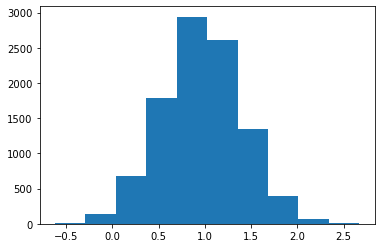

In [91]:
# For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee
# and non-coffee drinkers. Build a 99% confidence interval using your sampling distribution. 
# Use your interval to start answering the first quiz question below.

coffee_reduced = coffee_full.sample(200) #this is the only data you might actually get in the real world.
cof_height_avg = coffee_reduced[coffee_reduced['drinks_coffee']== True].height.mean()
non_cof_height_avg = coffee_reduced[coffee_reduced['drinks_coffee']== False].height.mean()
diff= cof_height_avg - non_cof_height_avg
print('the original diff is: ',diff)
### bootstrap sample and get the statistic
inference_diffs=[]
for _ in range(10000):
    sample=coffee_reduced.sample(200,replace=True)
    inference_diffs.append( sample[sample['drinks_coffee']== True].height.mean()
                            - sample[sample['drinks_coffee']== False].height.mean() )
#plot the distribution
plt.hist(inference_diffs)
#print the 99% confidence bounds
(np.percentile(inference_diffs,0.5),np.percentile(inference_diffs,99.5))
    
    

the original diff is:  4.018279139630565


(3.180689987880211, 4.871827974944483)

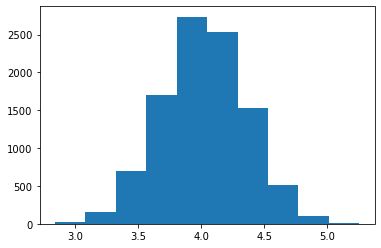

In [92]:
# For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights 
# for those older than 21 and those younger than 21. Build a 99% confidence interval
# using your sampling distribution.

coffee_reduced = coffee_full.sample(200) #this is the only data you might actually get in the real world.
less21_height_avg = coffee_reduced[coffee_reduced['age'] == "<21"].height.mean()
more21_height_avg = coffee_reduced[coffee_reduced['age'] == ">=21"].height.mean()
diff= more21_height_avg - less21_height_avg
print('the original diff is: ',diff)
### bootstrap sample and get the statistic
inference_diffs=[]
for _ in range(10000):
    sample=coffee_reduced.sample(200,replace=True)
    inference_diffs.append( sample[sample['age'] == ">=21"].height.mean()
                            - sample[sample['age'] == "<21"].height.mean() )
#plot the distribution
plt.hist(inference_diffs)
#print the 99% confidence bounds
(np.percentile(inference_diffs,0.5),np.percentile(inference_diffs,99.5))

the original diff is:  1.3759950364716502


(0.6611286302148791, 2.0777216720003957)

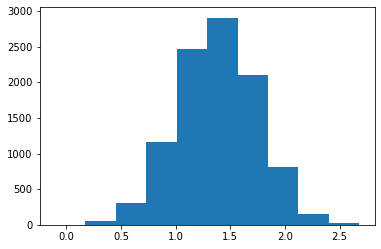

In [93]:
# For 10,000 iterations bootstrap your sample data,compute the difference in the average height for coffee
# drinkers and the average height for non-coffee drinkers for individuals under 21 years old.
#Using your sampling distribution, build a 95% confidence interval. 

coffee_reduced = coffee_full.sample(200) #this is the only data you might actually get in the real world.
cof_height_avg = coffee_reduced.query('age == "<21" and drinks_coffee == True').height.mean()
non_cof_height_avg = coffee_reduced.query('age == "<21" and drinks_coffee == False').height.mean()
diff= non_cof_height_avg - cof_height_avg 
print('the original diff is: ',diff)
### bootstrap sample and get the statistic
inference_diffs=[]
for _ in range(10000):
    sample=coffee_reduced.sample(200,replace=True)
    inference_diffs.append( sample.query('age == "<21" and drinks_coffee == False').height.mean()
                            - sample.query('age == "<21" and drinks_coffee == True').height.mean() )
#plot the distribution
plt.hist(inference_diffs)
#print the 99% confidence bounds
(np.percentile(inference_diffs,2.5),np.percentile(inference_diffs,97.5))

the original diff is:  1.9181425586128285


(0.6743882477633264, 3.0817241108569218)

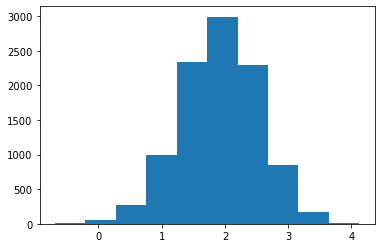

In [94]:
# For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee drinkers
# and the average height for non-coffee drinkers for individuals over 21 years old. 
#Using your sampling distribution, build a 95% confidence interval. 

coffee_reduced = coffee_full.sample(200) #this is the only data you might actually get in the real world.
cof_height_avg = coffee_reduced.query('age == ">=21" and drinks_coffee == True').height.mean()
non_cof_height_avg = coffee_reduced.query('age == ">=21" and drinks_coffee == False').height.mean()
diff= non_cof_height_avg - cof_height_avg 
print('the original diff is: ',diff)
### bootstrap sample and get the statistic
inference_diffs=[]
for _ in range(10000):
    sample=coffee_reduced.sample(200,replace=True)
    inference_diffs.append( sample.query('age == ">=21" and drinks_coffee == False').height.mean()
                            - sample.query('age == ">=21" and drinks_coffee == True').height.mean() )
#plot the distribution
plt.hist(inference_diffs)
#print the 99% confidence bounds
(np.percentile(inference_diffs,2.5),np.percentile(inference_diffs,97.5))



### Uptill now we were using bootstrap sampling with sample distributions to get the confidence intervals but there is also the tradidtional ways to do it like 
* t-test for population mean
* two sample t-test for comparing two means
* paired t-test to compare individuals to themselves
* z-test
* f-test
* CHI-Squared test

### but the great thing about bootstrapping is it would work for any of those only given that the sample has a good representation of population


### Compare bootstrabing to traditional ways

<p style="color:blue;font-size:25px">Bootstrapping and sampling distribution</p>

(0.3965686790909317, 2.243258868112464)

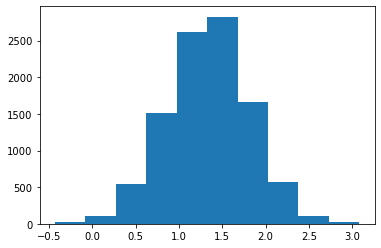

In [111]:
# For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee
# and non-coffee drinkers. Build a 99% confidence interval using your sampling distribution. 
# Use your interval to start answering the first quiz question below.
np.random.seed(42)

coffee_reduced = coffee_full.sample(200) 

### bootstrap sample and get the statistic
inference_diffs=[]
for _ in range(10000):
    sample=coffee_reduced.sample(200,replace=True)
    mean_cof= sample[sample['drinks_coffee']== True].height.mean()
    mean_nocof= sample[sample['drinks_coffee']== False].height.mean() 
    inference_diffs.append( mean_cof - mean_nocof)
#plot the distribution
plt.hist(inference_diffs)
#print the 95% confidence bounds
(np.percentile(inference_diffs,2.5),np.percentile(inference_diffs,97.5))
    
    

<p style="color:blue;font-size:25px">traditional way t-test</p>

In [107]:
import statsmodels.stats.api as sms

np.random.seed(42)


X1= coffee_reduced[coffee_reduced['drinks_coffee']== True]['height']
X2 = coffee_reduced[coffee_reduced['drinks_coffee']== False]['height']

cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
cm.tconfint_diff(usevar='unequal') 


(0.39600106159185633, 2.2734131570228913)

### both are nearly identical